In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/us-airline-flight-routes-and-fares-1993-2024/US Airline Flight Routes and Fares 1993-2024.csv


## STEP 0: IMPORTING LIBRARIES

In [2]:
# importting Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from itertools import combinations
import seaborn as sns
import warnings as wr
wr.filterwarnings('ignore')

## STEP 1: DATA COLLECTION

In [3]:
# loading and reading dataset
df = pd.read_csv("/kaggle/input/us-airline-flight-routes-and-fares-1993-2024/US Airline Flight Routes and Fares 1993-2024.csv")


In [4]:
# shape of the data
df.shape

(245955, 23)

In [5]:
#data information 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245955 entries, 0 to 245954
Data columns (total 23 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   tbl             245955 non-null  object 
 1   Year            245955 non-null  int64  
 2   quarter         245955 non-null  int64  
 3   citymarketid_1  245955 non-null  int64  
 4   citymarketid_2  245955 non-null  int64  
 5   city1           245955 non-null  object 
 6   city2           245955 non-null  object 
 7   airportid_1     245955 non-null  int64  
 8   airportid_2     245955 non-null  int64  
 9   airport_1       245955 non-null  object 
 10  airport_2       245955 non-null  object 
 11  nsmiles         245955 non-null  int64  
 12  passengers      245955 non-null  int64  
 13  fare            245955 non-null  float64
 14  carrier_lg      244415 non-null  object 
 15  large_ms        244415 non-null  float64
 16  fare_lg         244415 non-null  float64
 17  carrier_lo

In [6]:
# describing the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,245955.0,2008.524124,8.703364,1993.0000,2001.000,2008.0000,2016.0000,2024.0
quarter,245955.0,2.479153,1.122149,1.0000,1.000,2.0000,3.0000,4.0
citymarketid_1,245955.0,31556.430201,1089.872880,30135.0000,30721.000,31423.0000,32467.0000,35412.0
citymarketid_2,245955.0,32180.117086,1232.464184,30189.0000,30994.000,32211.0000,33192.0000,35628.0
airportid_1,245955.0,12437.099986,1431.665257,10135.0000,11193.000,12266.0000,13487.0000,16440.0
airportid_2,245955.0,13249.889525,1425.810159,10466.0000,12197.000,13303.0000,14679.0000,15919.0
nsmiles,245955.0,1189.812319,703.143472,109.0000,626.000,1023.0000,1736.0000,2724.0
passengers,245955.0,299.476795,511.389486,0.0000,21.000,113.0000,339.0000,8301.0
fare,245955.0,218.979587,82.372486,50.0000,164.620,209.3200,262.8900,3377.0
large_ms,244415.0,0.665252,0.224635,0.0038,0.480,0.6524,0.8719,1.0


In [7]:
df.head()

,tbl,Year,quarter,citymarketid_1,citymarketid_2,city1,city2,airportid_1,airportid_2,airport_1,...,fare,carrier_lg,large_ms,fare_lg,carrier_low,lf_ms,fare_low,Geocoded_City1,Geocoded_City2,tbl1apk
0,Table1a,2021,3,30135,33195,"Allentown/Bethlehem/Easton, PA","Tampa, FL (Metropolitan Area)",10135,14112,ABE,...,81.43,G4,1.0000,81.43,G4,1.0000,81.43,NaN,NaN,202131013514112ABEPIE
1,Table1a,2021,3,30135,33195,"Allentown/Bethlehem/Easton, PA","Tampa, FL (Metropolitan Area)",10135,15304,ABE,...,208.93,DL,0.4659,219.98,UA,0.1193,154.11,NaN,NaN,202131013515304ABETPA
2,Table1a,2021,3,30140,30194,"Albuquerque, NM","Dallas/Fort Worth, TX",10140,11259,ABQ,...,184.56,WN,0.9968,184.44,WN,0.9968,184.44,NaN,NaN,202131014011259ABQDAL
3,Table1a,2021,3,30140,30194,"Albuquerque, NM","Dallas/Fort Worth, TX",10140,11298,ABQ,...,182.64,AA,0.9774,183.09,AA,0.9774,183.09,NaN,NaN,202131014011298ABQDFW
4,Table1a,2021,3,30140,30466,"Albuquerque, NM","Phoenix, AZ",10140,14107,ABQ,...,177.11,WN,0.6061,184.49,AA,0.3939,165.77,NaN,NaN,202131014014107ABQPHX


In [8]:
#column to list 
df.columns.tolist()

['tbl',
 'Year',
 'quarter',
 'citymarketid_1',
 'citymarketid_2',
 'city1',
 'city2',
 'airportid_1',
 'airportid_2',
 'airport_1',
 'airport_2',
 'nsmiles',
 'passengers',
 'fare',
 'carrier_lg',
 'large_ms',
 'fare_lg',
 'carrier_low',
 'lf_ms',
 'fare_low',
 'Geocoded_City1',
 'Geocoded_City2',
 'tbl1apk']

In [9]:
data_types = df.dtypes
print(data_types)

tbl                object
Year                int64
quarter             int64
citymarketid_1      int64
citymarketid_2      int64
city1              object
city2              object
airportid_1         int64
airportid_2         int64
airport_1          object
airport_2          object
nsmiles             int64
passengers          int64
fare              float64
carrier_lg         object
large_ms          float64
fare_lg           float64
carrier_low        object
lf_ms             float64
fare_low          float64
Geocoded_City1     object
Geocoded_City2     object
tbl1apk            object
dtype: object


## STEP 3: DATA CLEANING

###  3.1 Checking the null values

In [10]:
# check for missing values:
df.isnull().sum()

tbl                   0
Year                  0
quarter               0
citymarketid_1        0
citymarketid_2        0
city1                 0
city2                 0
airportid_1           0
airportid_2           0
airport_1             0
airport_2             0
nsmiles               0
passengers            0
fare                  0
carrier_lg         1540
large_ms           1540
fare_lg            1540
carrier_low        1612
lf_ms              1612
fare_low           1612
Geocoded_City1    39206
Geocoded_City2    39206
tbl1apk               0
dtype: int64

###  3.2 Checking the duplicates

In [11]:
#checking duplicate values 
df.nunique()

tbl                    2
Year                  31
quarter                4
citymarketid_1       141
citymarketid_2       128
city1                141
city2                128
airportid_1          188
airportid_2          173
airport_1            187
airport_2            173
nsmiles             1155
passengers          3883
fare               36323
carrier_lg            67
large_ms            7367
fare_lg            37508
carrier_low           71
lf_ms               9687
fare_low           32283
Geocoded_City1       238
Geocoded_City2       207
tbl1apk           245955
dtype: int64

In [12]:
duplicates = df.duplicated().sum()
print(f'Duplicates: {duplicates}')

Duplicates: 0


###  3.3 Cleaning the null values

In [13]:
# Drop rows with any missing values
df_cleaned = df.dropna()

# Drop columns with any missing values
df_cleaned_columns = df.dropna(axis=1)

print(df_cleaned.shape)
print(df_cleaned_columns.shape)

(205189, 23)
(245955, 15)


###  3.4 Plotting Outliers using Z-Score

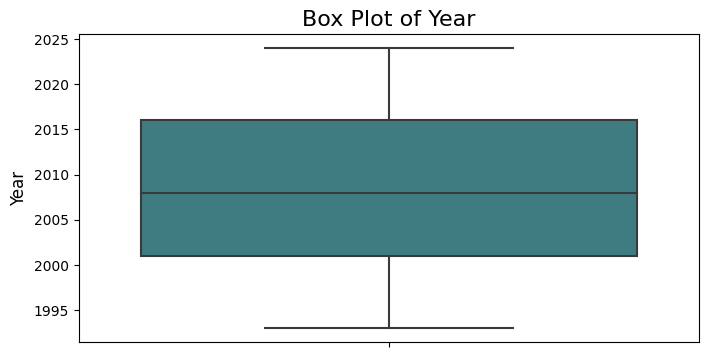

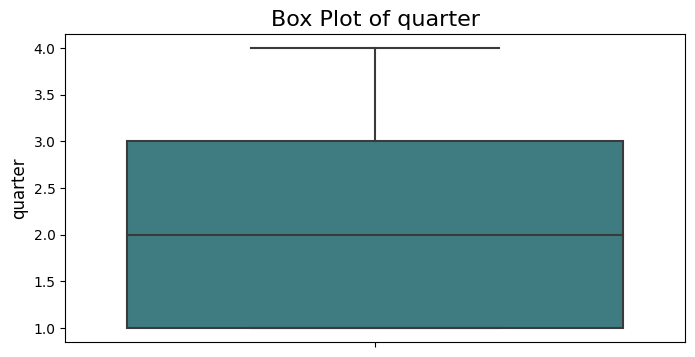

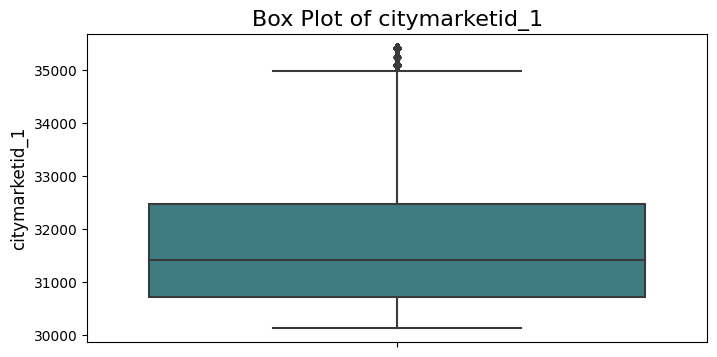

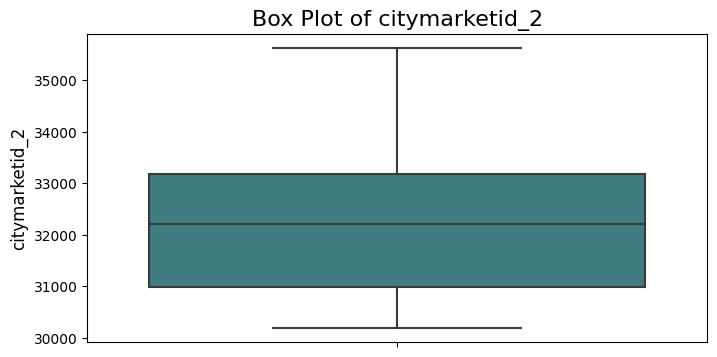

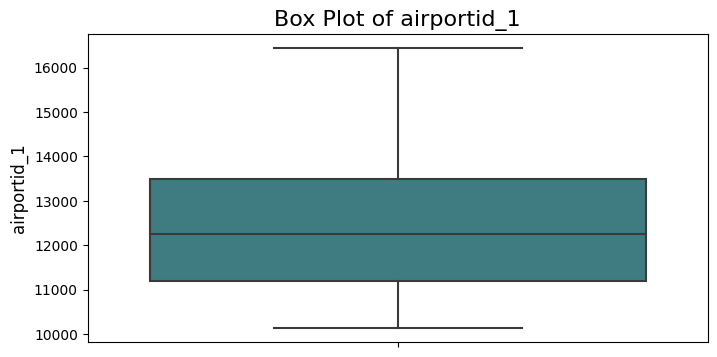

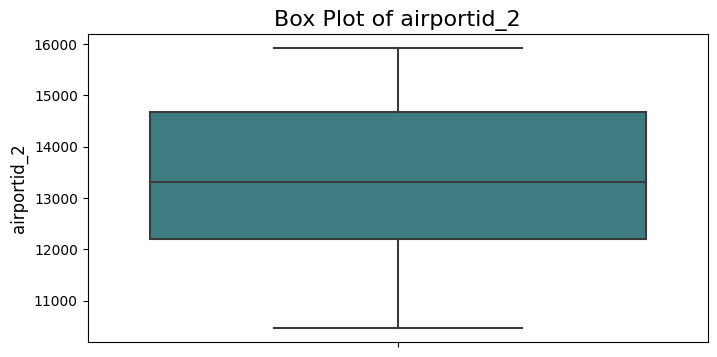

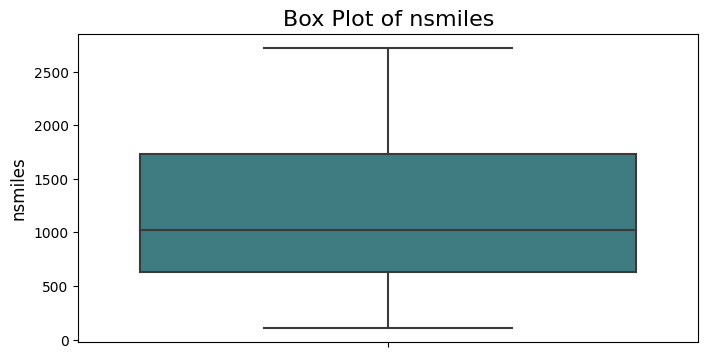

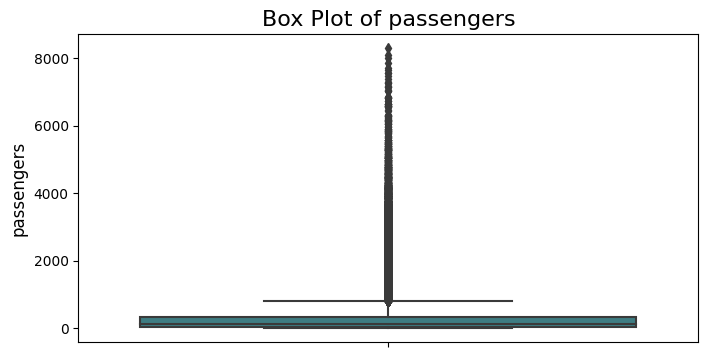

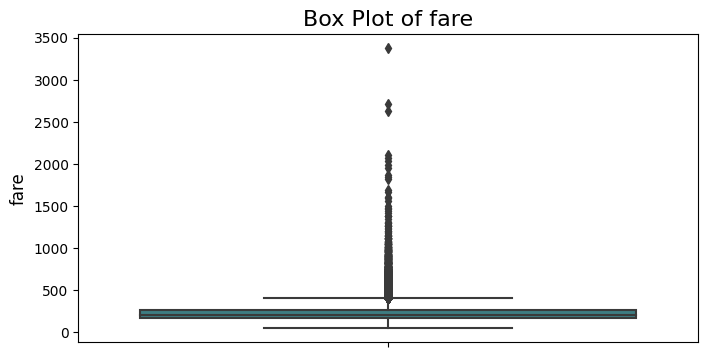

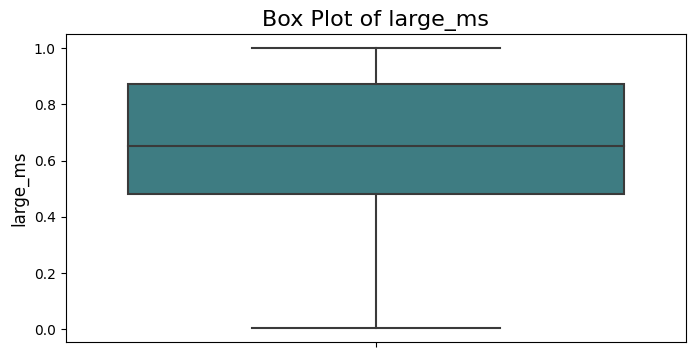

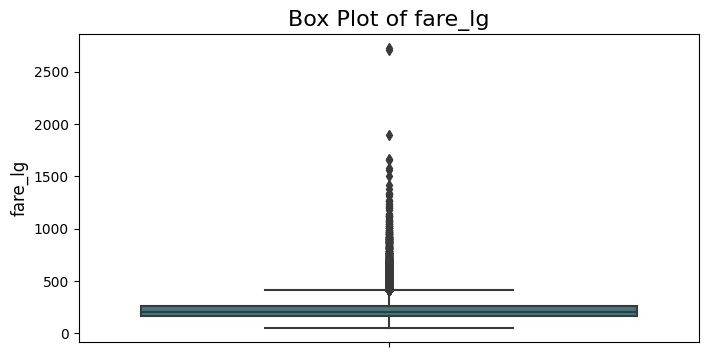

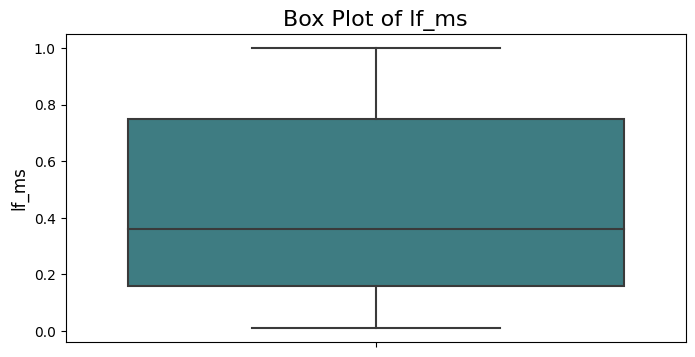

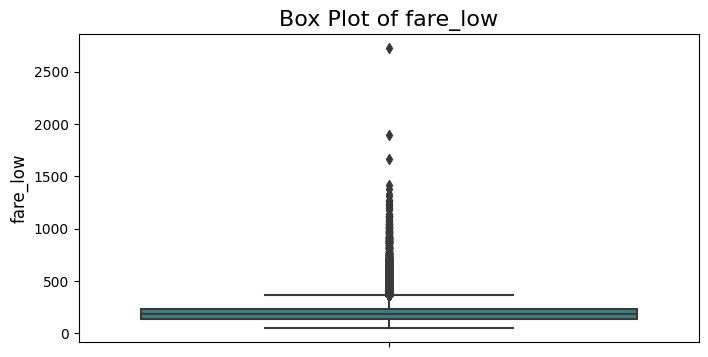

In [14]:
# Calculate Z-scores
z_scores = stats.zscore(df.select_dtypes(include=['float64', 'int64']))

# Identify outliers
outlier_condition = (z_scores > 3).any(axis=1) | (z_scores < -3).any(axis=1)
df_outliers = df[outlier_condition]

# Create separate box plots for each column using the viridis color palette
for column in df.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(y=df[column], palette='crest')
    plt.title(f'Box Plot of {column}', fontsize=16)
    plt.ylabel(column, fontsize=12)
    plt.show()


### 3.5 Removing the Outliers 

In [15]:
# Calculate Z-scores
z_scores = stats.zscore(df.select_dtypes(include=['float64', 'int64']))

# Define outlier condition
outlier_condition = (z_scores > 3).any(axis=1) | (z_scores < -3).any(axis=1)

# Remove outliers
df = df[~outlier_condition]

## STEP 4: EXPLORATORY DATA ANALYSIS

### 4.1 How are the fare and nsmiles distributed?

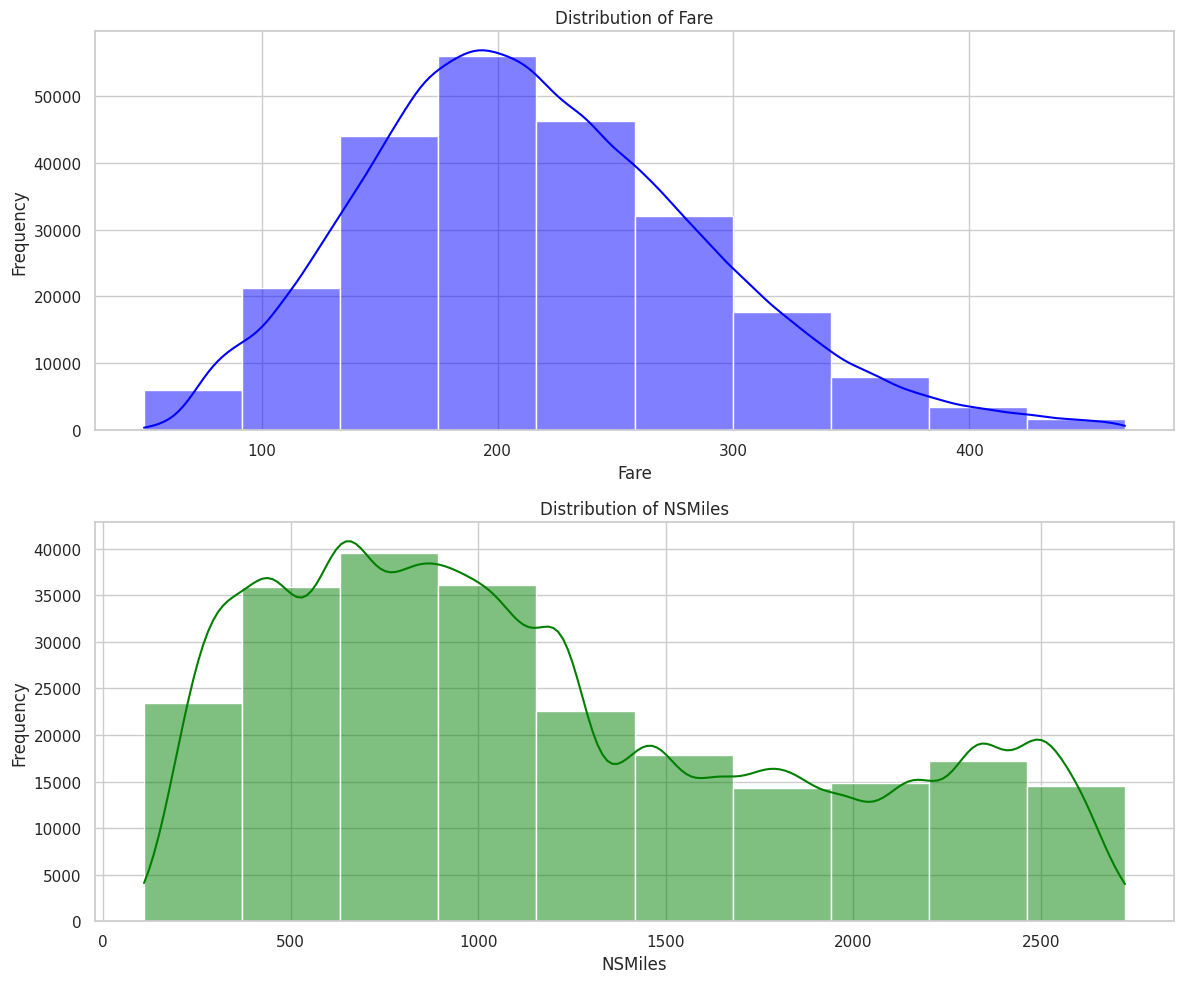

In [16]:
# Set the style of seaborn
sns.set(style="whitegrid")

# Create subplots for both fare and nsmiles
fig, axes = plt.subplots(2, 1, figsize=(12, 10))  # Adjusted to 2 rows, 1 column

# Histogram for fare
sns.histplot(df['fare'], bins=10, kde=True, ax=axes[0], color='blue')
axes[0].set_title('Distribution of Fare')
axes[0].set_xlabel('Fare')
axes[0].set_ylabel('Frequency')

# Histogram for nsmiles
sns.histplot(df['nsmiles'], bins=10, kde=True, ax=axes[1], color='green')
axes[1].set_title('Distribution of NSMiles')
axes[1].set_xlabel('NSMiles')
axes[1].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()

### 4.2 What is the relationship between fare and nsmiles?

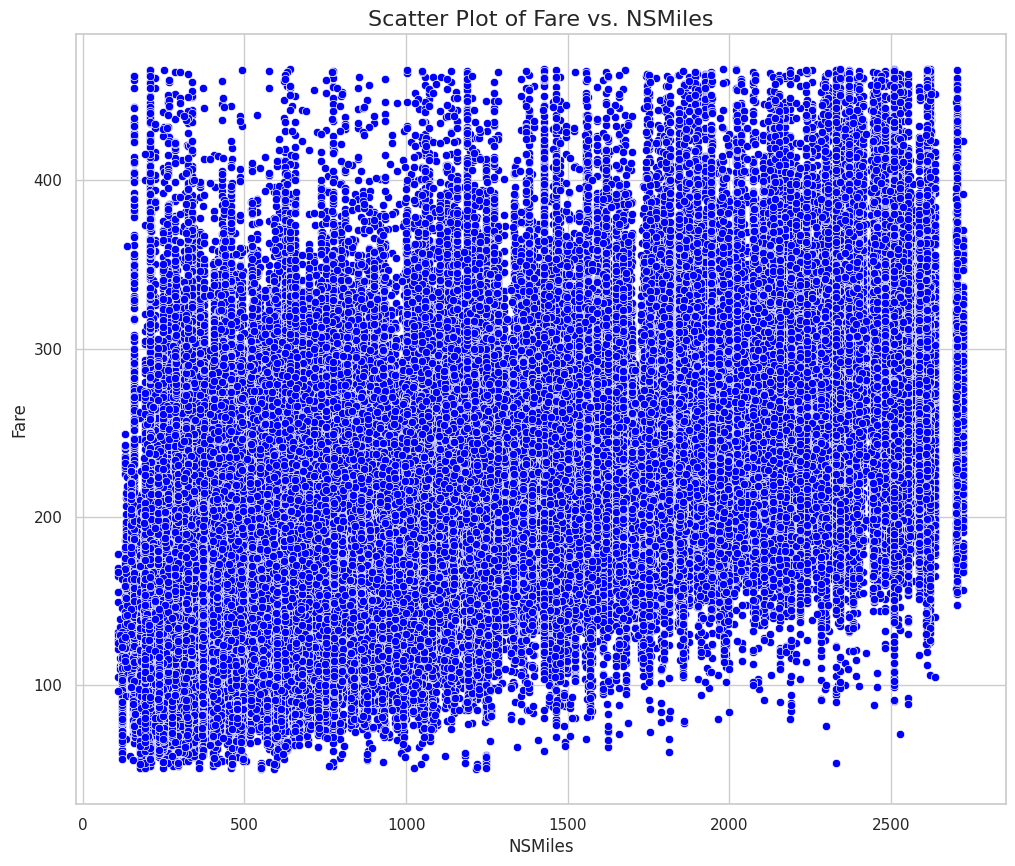

Correlation between fare and nsmiles: 0.53


In [17]:
# Scatter Plot
plt.figure(figsize=(12, 10))
sns.scatterplot(x='nsmiles', y='fare', data=df, color='blue')
plt.title('Scatter Plot of Fare vs. NSMiles', fontsize=16)
plt.xlabel('NSMiles', fontsize=12)
plt.ylabel('Fare', fontsize=12)
plt.show()

# Calculate the correlation coefficient
correlation = df['fare'].corr(df['nsmiles'])
print(f'Correlation between fare and nsmiles: {correlation:.2f}')


### 4.3 What is the average fare by year?

In [18]:
# Calculate average fare by year
average_fare_by_year = df.groupby('Year')['fare'].mean().reset_index()

# Rename columns for clarity
average_fare_by_year.columns = ['Year', 'Average Fare']

# Display the result
print(average_fare_by_year)

    Year  Average Fare
0   1993    211.729818
1   1994    214.165083
2   1996    199.033113
3   1997    201.321396
4   1998    203.883054
5   1999    204.324856
6   2000    212.048543
7   2001    196.764739
8   2002    191.609860
9   2003    195.422196
10  2004    188.363423
11  2005    187.310921
12  2006    205.426836
13  2007    202.524313
14  2008    217.731407
15  2009    193.944343
16  2010    211.826215
17  2011    230.506806
18  2012    238.635096
19  2013    243.227785
20  2014    249.833418
21  2015    246.172721
22  2016    240.214447
23  2017    239.376206
24  2018    239.601787
25  2019    241.553785
26  2020    192.249697
27  2021    205.691138
28  2022    245.636788
29  2023    247.491335
30  2024    251.640956


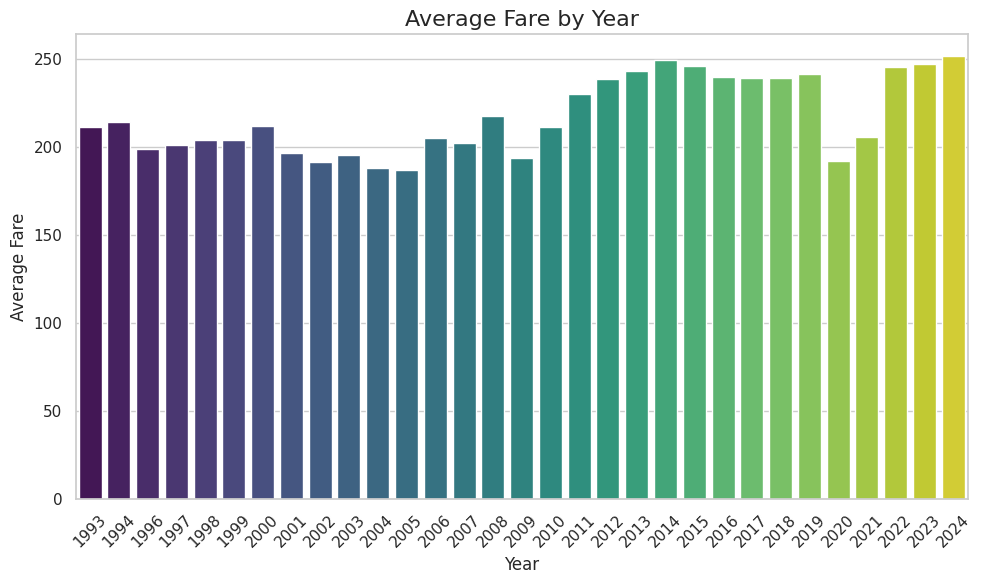

In [19]:
# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='Year', y='Average Fare', data=average_fare_by_year, palette='viridis')
plt.title('Average Fare by Year', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Fare', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### 4.4 How does the passenger count vary across different city1?

Plot of top 10 cities with passengers: 

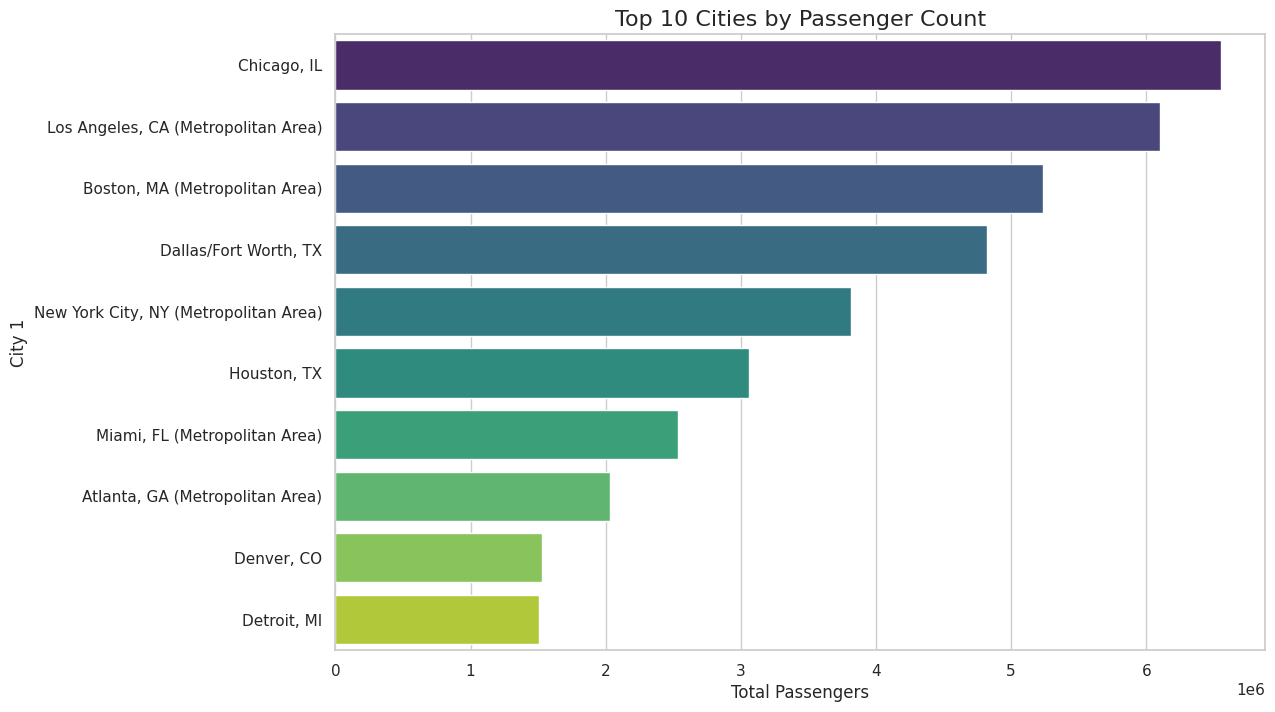

In [20]:
# Set the figure size
plt.figure(figsize=(12, 8))

# Calculate total passengers by city and get the top 10
top_cities = df.groupby('city1')['passengers'].sum().nlargest(10).reset_index()

# Create the bar plot
sns.barplot(x='passengers', y='city1', data=top_cities, palette='viridis')

# Add titles and labels
plt.title('Top 10 Cities by Passenger Count', fontsize=16)
plt.xlabel('Total Passengers', fontsize=12)
plt.ylabel('City 1', fontsize=12)

# Show the plot
plt.show()

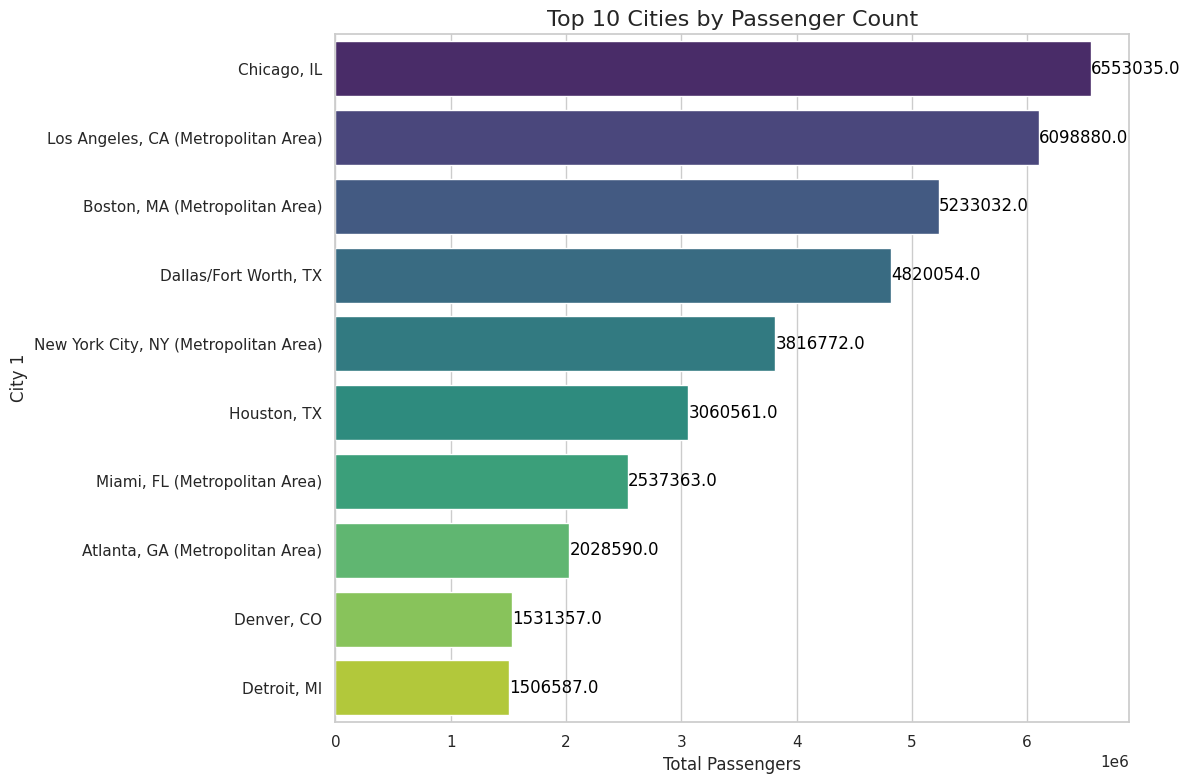

In [21]:
# Set the figure size
plt.figure(figsize=(12, 8))

# Calculate total passengers by city and get the top 10
top_cities = df.groupby('city1')['passengers'].sum().nlargest(10).reset_index()

# Create the bar plot
ax = sns.barplot(x='passengers', y='city1', data=top_cities, palette='viridis')

# Add titles and labels
plt.title('Top 10 Cities by Passenger Count', fontsize=16)
plt.xlabel('Total Passengers', fontsize=12)
plt.ylabel('City 1', fontsize=12)

# Add data labels to each bar
for p in ax.patches:
    ax.annotate(f'{p.get_width()}', 
                (p.get_width(), p.get_y() + p.get_height() / 2), 
                ha='left', va='center', 
                fontsize=12, 
                color='black')

# Show the plot
plt.tight_layout()
plt.show()


### 4.5 What is the distribution of carrier_lg and carrier_low market shares?

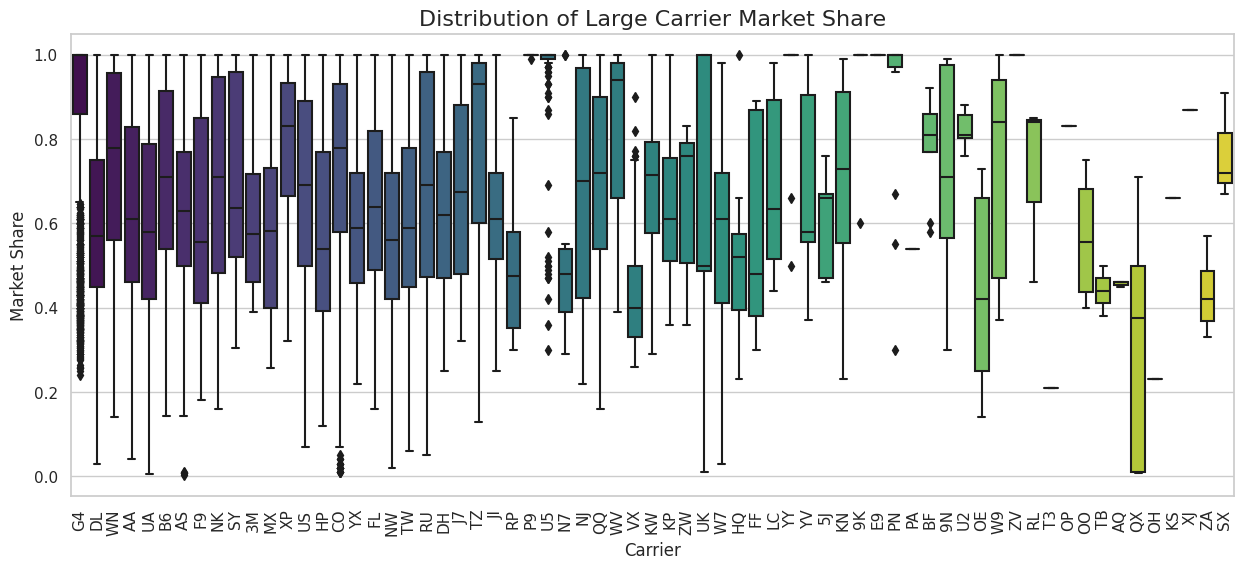

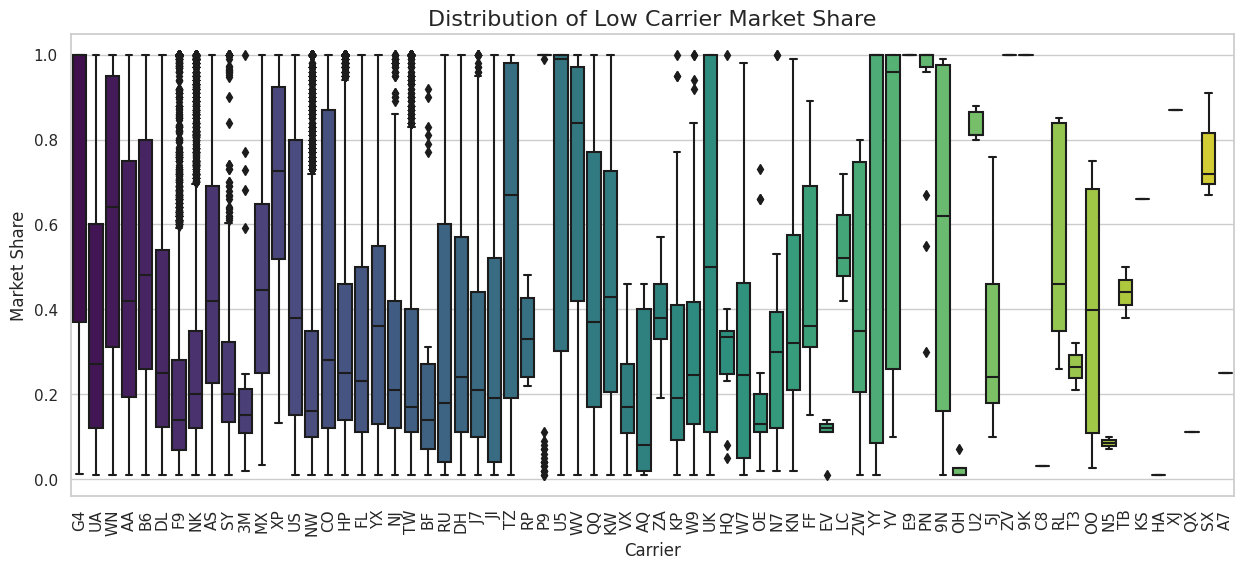

In [22]:

# Box plot for large carrier market share
plt.figure(figsize=(15, 6))
sns.boxplot(x='carrier_lg', y='large_ms', data=df,palette='viridis')
plt.title('Distribution of Large Carrier Market Share', fontsize=16)
plt.xlabel('Carrier', fontsize=12)
plt.xticks(rotation=90)
plt.ylabel('Market Share', fontsize=12)
plt.show()

# Box plot for low carrier market share
plt.figure(figsize=(15, 6))
sns.boxplot(x='carrier_low', y='lf_ms', data=df,palette='viridis')
plt.title('Distribution of Low Carrier Market Share', fontsize=16)
plt.xlabel('Carrier', fontsize=12)
plt.xticks(rotation=90)
plt.ylabel('Market Share', fontsize=12)
plt.show()

### 4.6 What are the most common airport_1 and airport_2 pairs?

In [23]:
# Create a new column for airport pairs
df['airport_pair'] = df.apply(lambda row: tuple(sorted([row['airport_1'], row['airport_2']])), axis=1)

# Count the occurrences of each airport pair
common_pairs = df['airport_pair'].value_counts().reset_index()

# Rename columns for clarity
common_pairs.columns = ['Airport Pair', 'Count']

# Get the most common pairs
most_common_pairs = common_pairs.nlargest(10, 'Count')

# Display the result
print(most_common_pairs)

  Airport Pair  Count
0   (HPN, RSW)    118
1   (DTW, JFK)    118
2   (DTW, ONT)    118
3   (DTW, LGB)    118
4   (DTW, LAX)    118
5   (BUR, DTW)    118
6   (DTW, MIA)    118
7   (DTW, SFO)    118
8   (DTW, OAK)    118
9   (DTW, ISP)    118


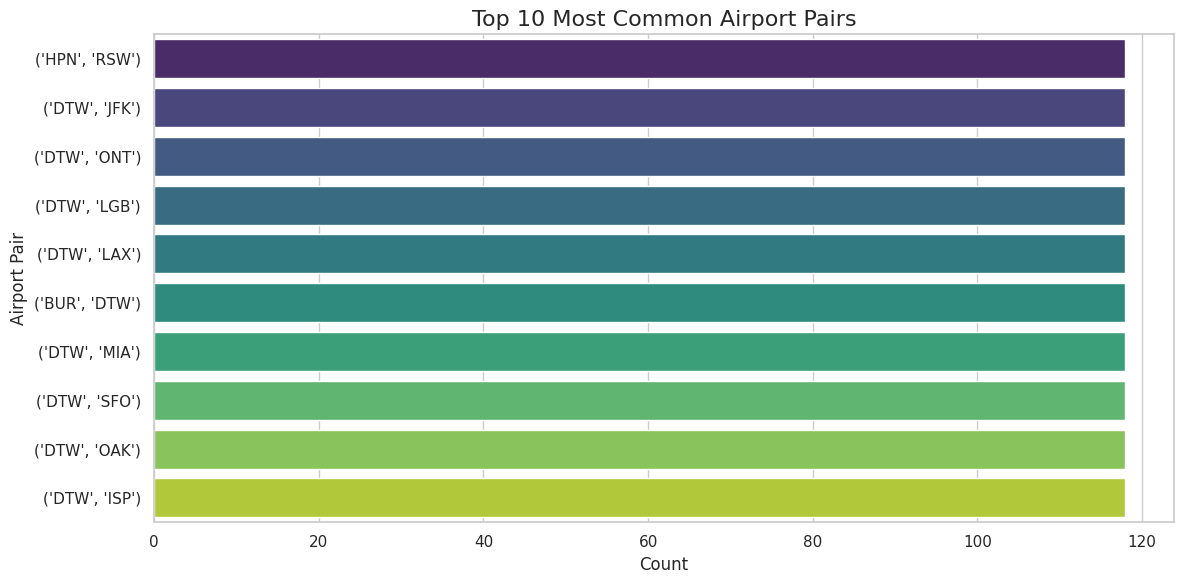

In [24]:
# Create a new column for airport pairs
df['airport_pair'] = df.apply(lambda row: tuple(sorted([row['airport_1'], row['airport_2']])), axis=1)

# Count the occurrences of each airport pair
common_pairs = df['airport_pair'].value_counts().reset_index()

# Rename columns for clarity
common_pairs.columns = ['Airport Pair', 'Count']

# Get the most common pairs
most_common_pairs = common_pairs.nlargest(10, 'Count')

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x='Count', y='Airport Pair', data=most_common_pairs, palette='viridis')
plt.title('Top 10 Most Common Airport Pairs', fontsize=16)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Airport Pair', fontsize=12)
plt.tight_layout()
plt.show()

### 4.7 Which city1 and city2 combinations have the highest average fare?

In [25]:
# Calculate the average fare by city1 and city2 combinations
average_fare = df.groupby(['city1', 'city2'])['fare'].mean().reset_index()

# Rename columns for clarity
average_fare.columns = ['City 1', 'City 2', 'Average Fare']

# Get the combinations with the highest average fare
highest_average_fare = average_fare.nlargest(10, 'Average Fare')

# Display the result
print(highest_average_fare)

                                     City 1  \
44                                Aspen, CO   
626                             El Paso, TX   
620                               Eagle, CO   
793                             Jackson, WY   
776                          Huntsville, AL   
713                            Hartford, CT   
45                                Aspen, CO   
206                             Bozeman, MT   
1064  New York City, NY (Metropolitan Area)   
368                          Cincinnati, OH   

                                     City 2  Average Fare  
44            Miami, FL (Metropolitan Area)    398.735000  
626           Miami, FL (Metropolitan Area)    391.130000  
620           Miami, FL (Metropolitan Area)    382.840909  
793   New York City, NY (Metropolitan Area)    375.781477  
776     Los Angeles, CA (Metropolitan Area)    360.478889  
713                Minneapolis/St. Paul, MN    345.910000  
45    New York City, NY (Metropolitan Area)    341.788421  
20

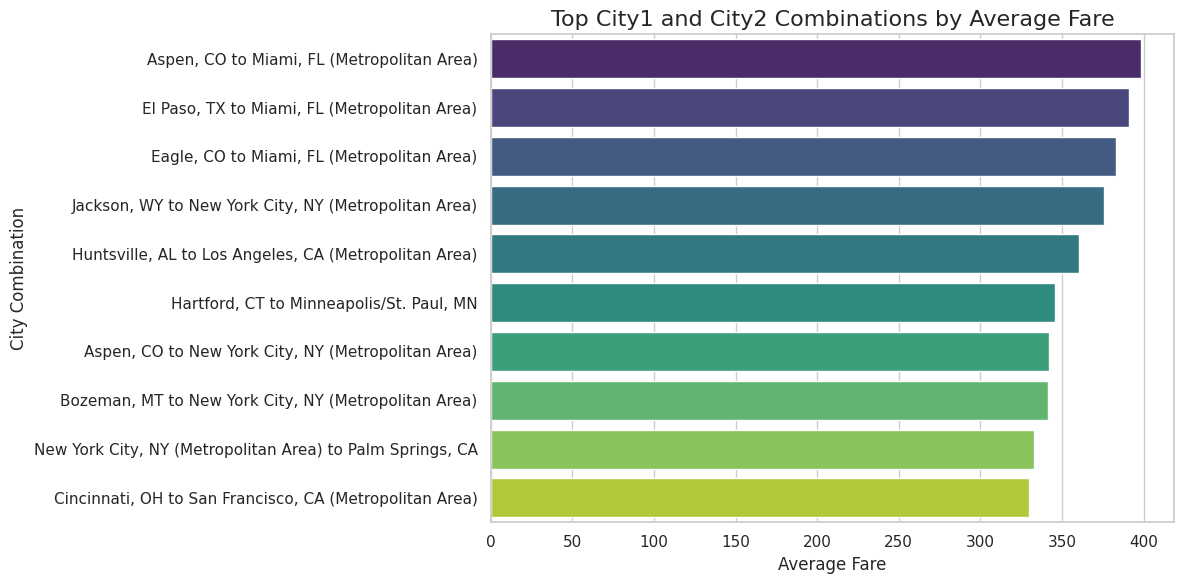

In [26]:
# Plotting the top combinations
plt.figure(figsize=(12, 6))
sns.barplot(x='Average Fare', y='City 1 + City 2', data=highest_average_fare.assign(**{'City 1 + City 2': highest_average_fare['City 1'] + " to " + highest_average_fare['City 2']}), palette='viridis')
plt.title('Top City1 and City2 Combinations by Average Fare', fontsize=16)
plt.xlabel('Average Fare', fontsize=12)
plt.ylabel('City Combination', fontsize=12)
plt.tight_layout()
plt.show()

### 4.8  How does the passenger count vary by quarter and year?

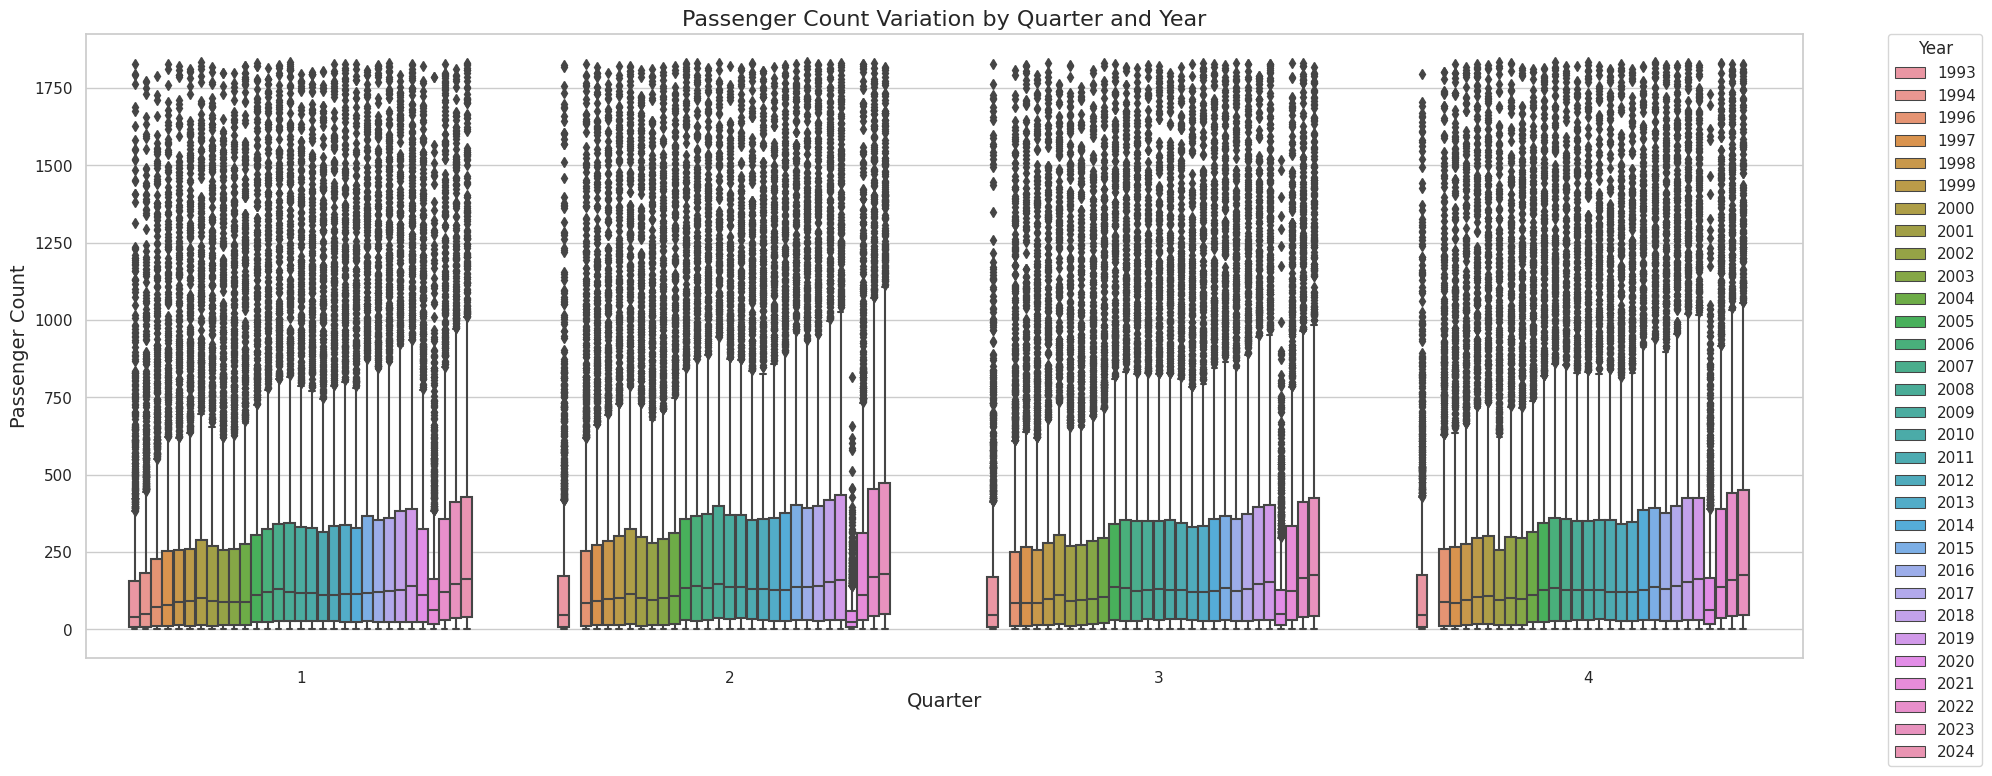

In [27]:
# Create the box plot
plt.figure(figsize=(20, 8))
sns.boxplot(x='quarter', y='passengers', hue='Year', data=df)
plt.title('Passenger Count Variation by Quarter and Year', fontsize=16)
plt.xlabel('Quarter', fontsize=14)
plt.ylabel('Passenger Count', fontsize=14)
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.tight_layout()
plt.show()

### 4.9 What are the busiest airports in terms of passenger count?

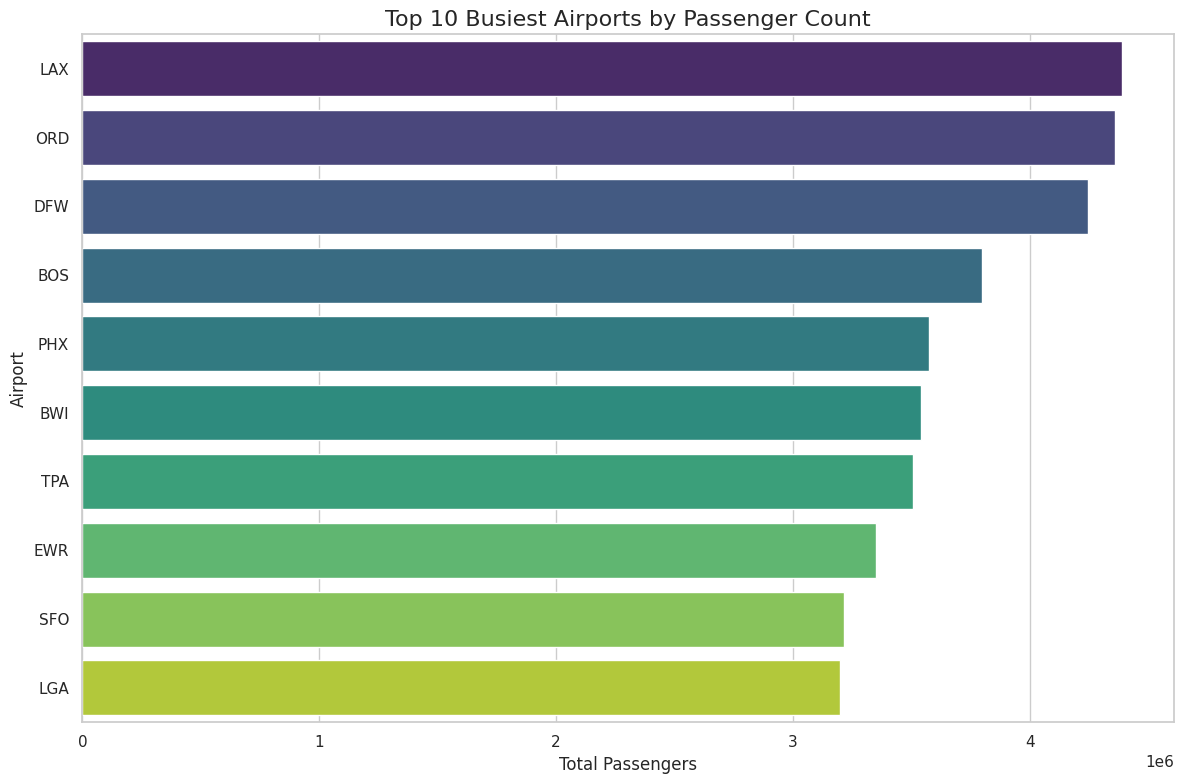

In [28]:
# Group by airport_1 and airport_2 separately and sum passengers
airport1_passengers = df.groupby('airport_1')['passengers'].sum().reset_index()
airport2_passengers = df.groupby('airport_2')['passengers'].sum().reset_index()

# Rename columns for clarity before concatenation
airport1_passengers.rename(columns={'airport_1': 'airport', 'passengers': 'total_passengers'}, inplace=True)
airport2_passengers.rename(columns={'airport_2': 'airport', 'passengers': 'total_passengers'}, inplace=True)

# Concatenate the results
busiest_airports = pd.concat([airport1_passengers, airport2_passengers], ignore_index=True)

# Group by airport and sum total passengers
busiest_airports = busiest_airports.groupby('airport')['total_passengers'].sum().reset_index()

# Get the top 10 busiest airports
top_airports = busiest_airports.nlargest(10, 'total_passengers')

# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(x='total_passengers', y='airport', data=top_airports, palette='viridis')
plt.title('Top 10 Busiest Airports by Passenger Count', fontsize=16)
plt.xlabel('Total Passengers', fontsize=12)
plt.ylabel('Airport', fontsize=12)
plt.tight_layout()
plt.show()

### 4.10 How do fare and passenger counts vary across different carrier_lg?

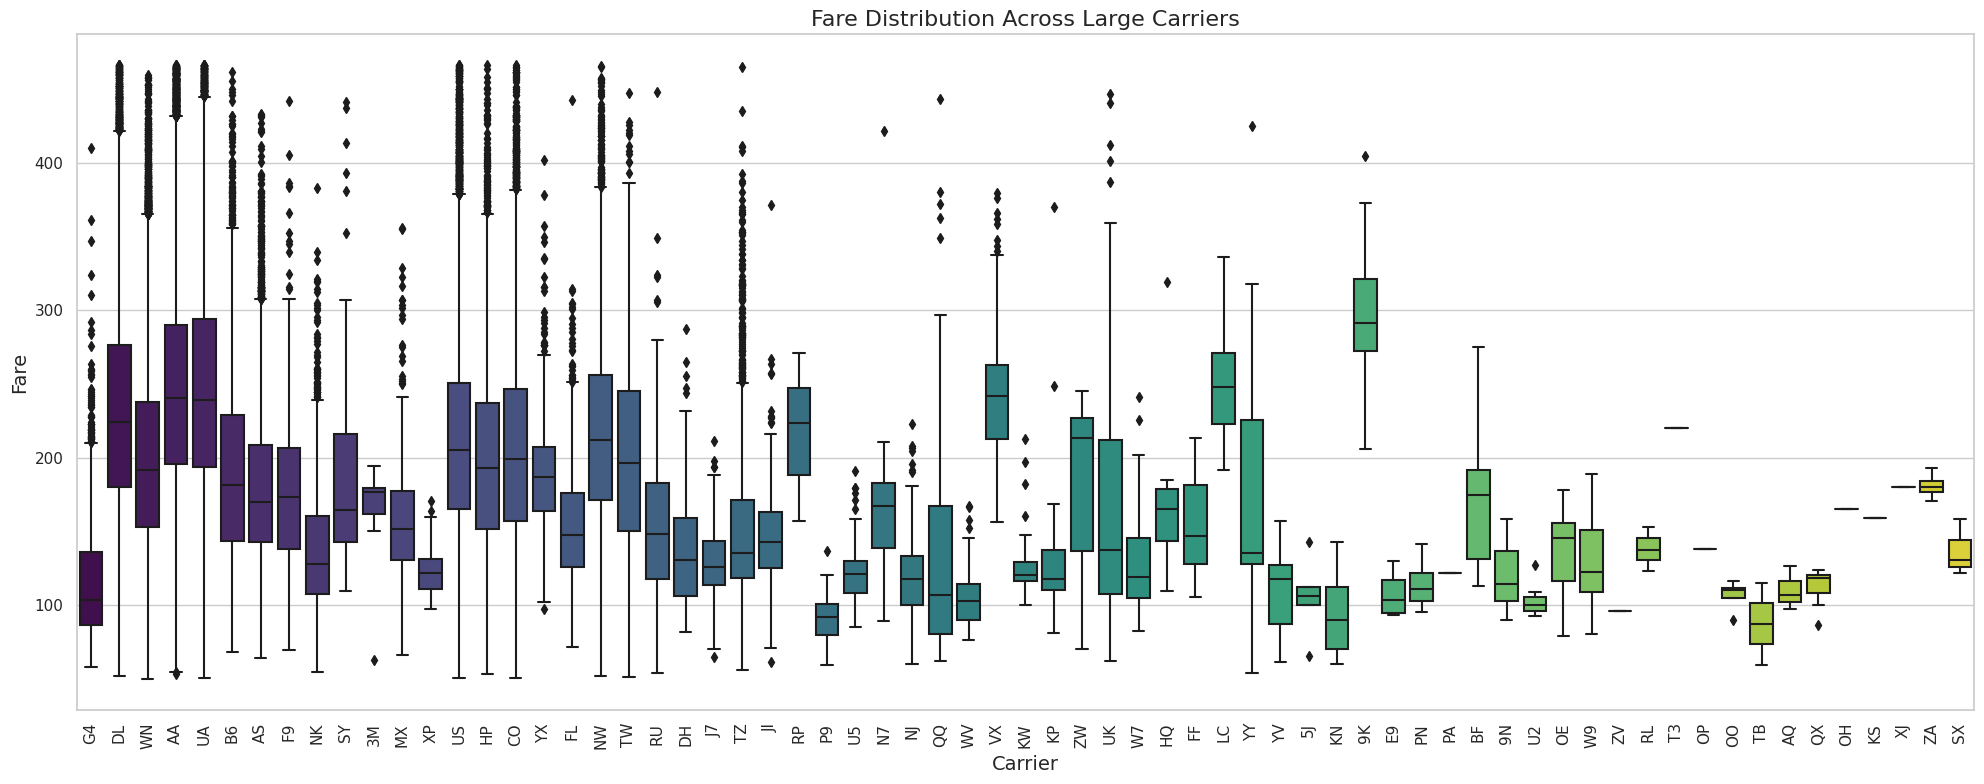

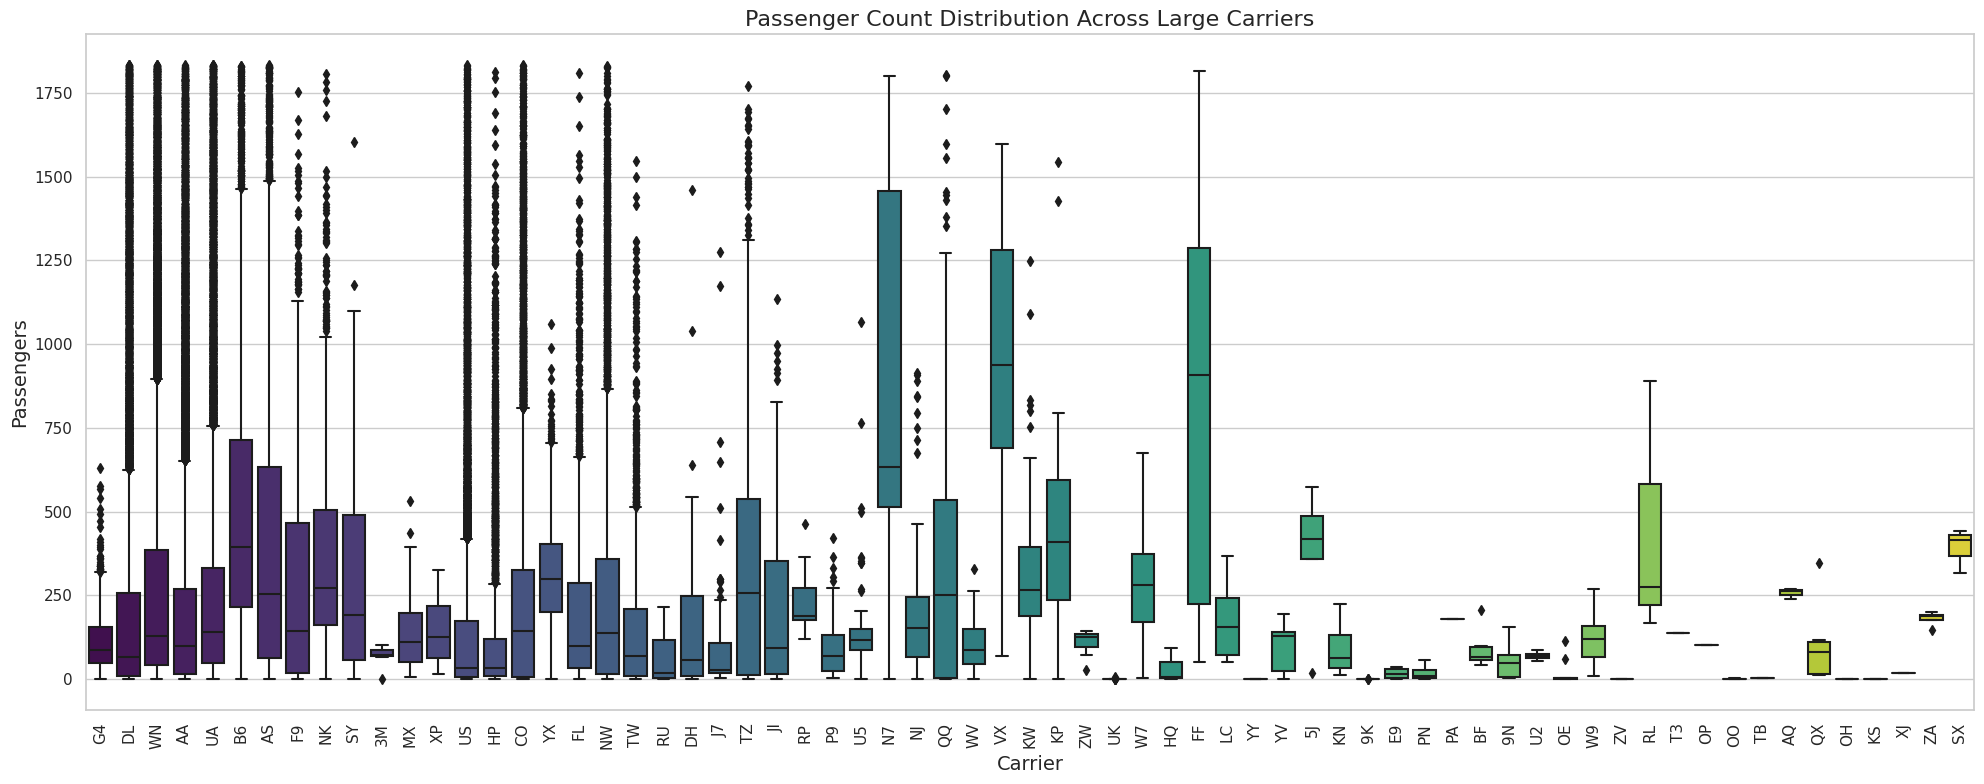

In [29]:
# Box plot for fare distribution
plt.figure(figsize=(20, 8))
sns.boxplot(x='carrier_lg', y='fare', data=df, palette='viridis')
plt.title('Fare Distribution Across Large Carriers', fontsize=16)
plt.xlabel('Carrier', fontsize=14)
plt.ylabel('Fare', fontsize=14)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Box plot for passenger count distribution
plt.figure(figsize=(20, 8))
sns.boxplot(x='carrier_lg', y='passengers', data=df, palette='viridis')
plt.title('Passenger Count Distribution Across Large Carriers', fontsize=16)
plt.xlabel('Carrier', fontsize=14)
plt.ylabel('Passengers', fontsize=14)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### 4.11 Which city1 has the most routes originating from it?

The city with the most routes is Los Angeles, CA (Metropolitan Area) with 24685 routes.


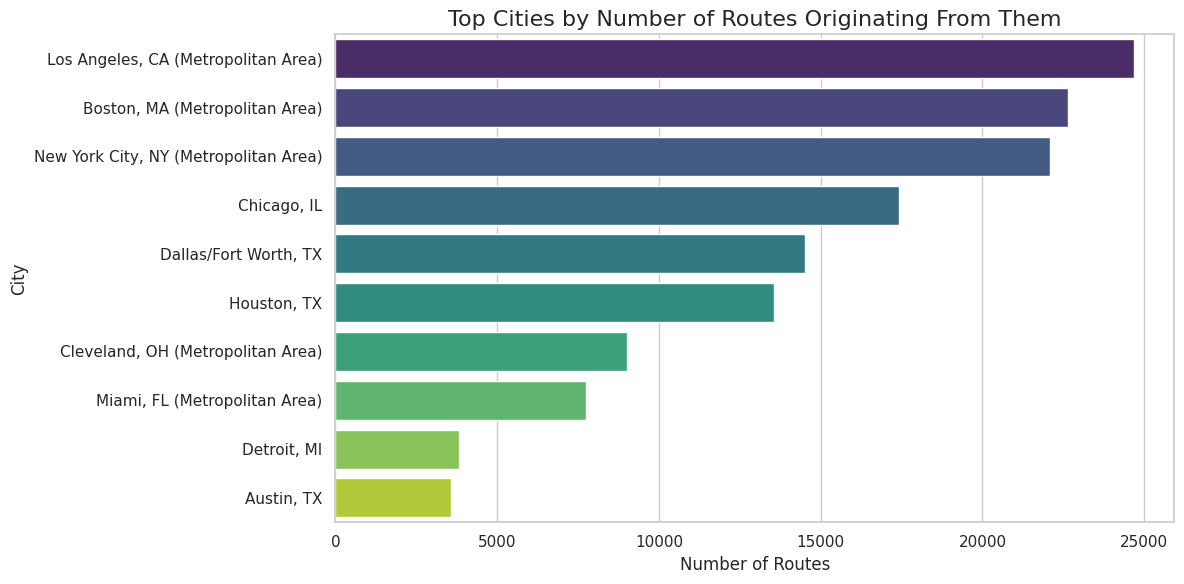

In [30]:
# Count the number of routes originating from each city1
route_counts = df['city1'].value_counts().reset_index()
route_counts.columns = ['city1', 'num_routes']

# Identify the city with the most routes
most_routes_city = route_counts.iloc[0]

# Display the result
print(f"The city with the most routes is {most_routes_city['city1']} with {most_routes_city['num_routes']} routes.")

# Plotting the top cities with the most routes
plt.figure(figsize=(12, 6))
sns.barplot(x='num_routes', y='city1', data=route_counts.head(10), palette='viridis')
plt.title('Top Cities by Number of Routes Originating From Them', fontsize=16)
plt.xlabel('Number of Routes', fontsize=12)
plt.ylabel('City', fontsize=12)
plt.tight_layout()
plt.show()

### 4.12 How do fare_lg and fare_low compare for the same routes?

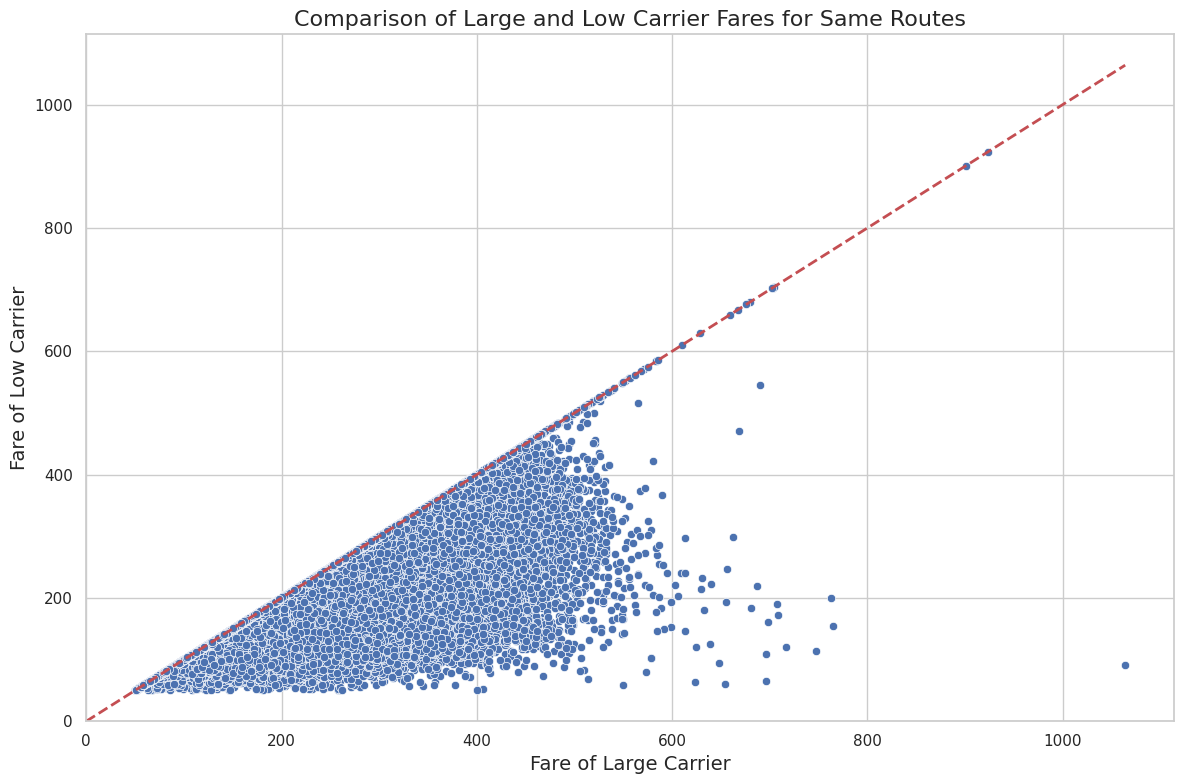

In [31]:
# Create a scatter plot
plt.figure(figsize=(12, 8))
sns.scatterplot(x='fare_lg', y='fare_low', data=df)

# Add a line of equality for reference
max_fare = max(df['fare_lg'].max(), df['fare_low'].max())
plt.plot([0, max_fare], [0, max_fare], 'r--', linewidth=2)  # Line y=x

plt.title('Comparison of Large and Low Carrier Fares for Same Routes', fontsize=16)
plt.xlabel('Fare of Large Carrier', fontsize=14)
plt.ylabel('Fare of Low Carrier', fontsize=14)
plt.grid(True)
plt.xlim(0, max_fare + 50)
plt.ylim(0, max_fare + 50)
plt.tight_layout()
plt.show()

### 4.13 How does market share (large_ms vs lf_ms) vary across different year?

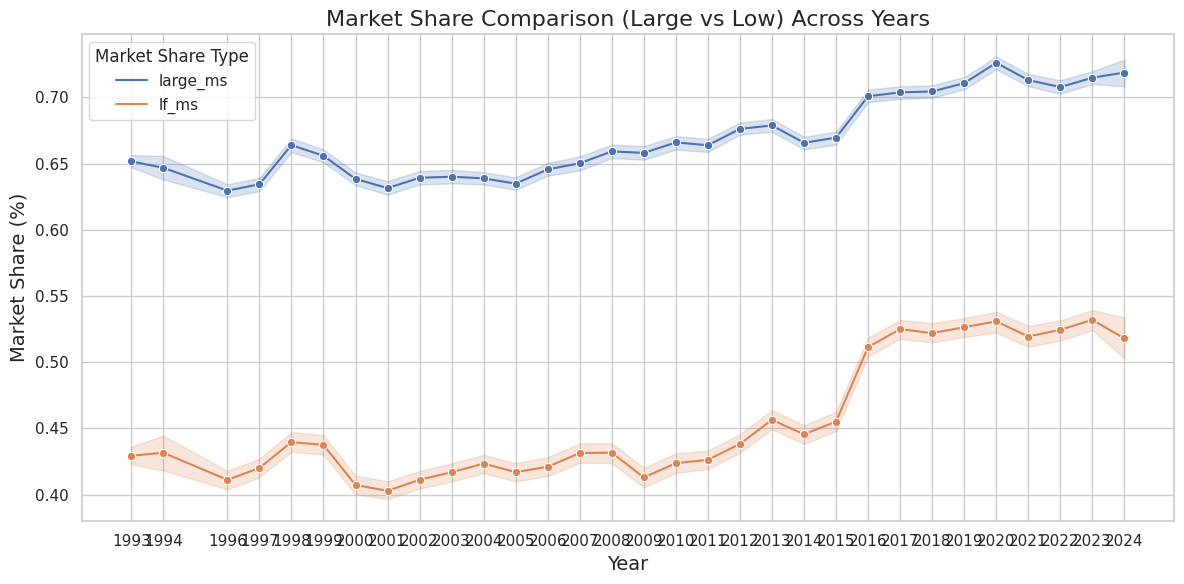

In [32]:
# Melt the DataFrame for easier plotting
df_melted = df.melt(id_vars='Year', value_vars=['large_ms', 'lf_ms'], 
                    var_name='Market Share Type', value_name='Market Share')

# Create a line plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_melted, x='Year', y='Market Share', hue='Market Share Type', marker='o')

# Titles and labels
plt.title('Market Share Comparison (Large vs Low) Across Years', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Market Share (%)', fontsize=14)
plt.grid(True)
plt.xticks(df['Year'].unique())  # Set x-ticks to years
plt.tight_layout()
plt.show()